# "UFO Sightings Around the World" Analysis

![dataset cover](./images/dataset-cover.png)


## Project Overview

This project explores patterns and trends in UFO sightings around the world by analyzing a dataset containing over 80,000 records from 1949 2013. By examining the timing, location, and characteristics of these sightings, we aim to answer key questions about the most common UFO shapes, when and where UFO sightings are most frequent, and if any correlations can be drawn between the time of sighting and the likelihood of a UFO encounter.

The goal is to uncover insights that could inform stakeholders like NASA, SpaceX, and other space exploration organizations about potential patterns in extraterrestrial encounters, as well as provide useful data for anyone interested in studying UFO sightings.

Where data is contained 

## Data Understanding 


## Business Understanding 

What regions and times have the highest frequency of UFO sightings?

Are there notable patterns in UFO shapes, descriptions, or lengths of encounters?

Can any correlations be drawn between the timing (season, time of day) and the likelihood of a sighting?


Setup: Load Data with pandas 

In [68]:
import pandas as pd
import numpy as np

import os
os.chdir("/Users/saniaspry/Documents/Flatiron/Assignments/Phase1/Phase-1 Project/Phase-1-Project/")


In [69]:
ufo_df = pd.read_csv("data/ufo_data/ufo-sightings-transformed.csv", index_col=0)
ufo_df.head()
#It looks like that CSV came with an index column, resulting in an extra column
#called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [70]:
ufo_df.shape
ufo_df.tail(10)

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
80318,2013-09-09 21:00:00,9/30/2013,2013,9,21,Autumn,POL,Poland,Lublin Voivodeship,Kolonia Aleksandrów,50.465843,22.891814,Light,15.0,15 seconds,Two points of light following one another in a...
80319,2013-09-09 21:00:00,9/30/2013,2013,9,21,Autumn,USA,United States,Florida,Gainesville,29.651389,-82.325000,Triangle,60.0,1 minute,Three lights in the sky that didn&#39t look li...
80320,2013-09-09 21:00:00,9/30/2013,2013,9,21,Autumn,USA,United States,North Carolina,Hampstead,34.367594,-77.710548,Light,120.0,2 minutes,8 to ten lights bright orange in color large t...
80321,2013-09-09 21:00:00,9/30/2013,2013,9,21,Autumn,CAN,Canada,Prince Edward Island,Milton Station,46.300000,-63.216667,Fireball,180.0,3 minutes,Massive Bright Orange Fireball in Sky
80322,2013-09-09 21:00:00,9/30/2013,2013,9,21,Autumn,USA,United States,Georgia,Woodstock,34.101389,-84.519444,Sphere,20.0,20 seconds,Driving 575 at 21:00 hrs saw a white and green...
80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...
80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44
80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...
80327,2013-09-09 23:00:00,9/30/2013,2013,9,23,Autumn,USA,United States,Oklahoma,Edmond,35.652778,-97.477778,Cigar,1020.0,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...


In [71]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encounter_s

Missing data in country code, country, region, locale, ufo shape, and description

Data Preparation

## 2. Perform Data Cleaning Required to Answer Questions

Recall that the first question is: *What regions and times have the highest frequency of UFO sightings?*

To answer this question, we will only need to use `ufo_df`, which contains the `Country`, `Region`, `Locale`, `Year`, `Month`, `hour`, `Season`, `latitude`, and `longitude` column.

### Identifying and Handling Missing Values

As you likely noted above, the `Country`, `Region`, and `locale`,  columns are missing some values. Let's take a look at some samples with and without missing  values:

In [72]:
has_country_sample = ufo_df[ufo_df['Country'].notna()].sample(5, random_state=1

)

has_country_sample

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
15890,1972-11-08 20:00:00,12/14/2004,1972,11,20,Autumn,USA,United States,Arizona,Tucson,32.221667,-110.925833,Triangle,900.0,10-15 min,Dark triangular object emitting &quot;dread&qu...
14378,2003-11-04 20:00:00,11/8/2003,2003,11,20,Autumn,USA,United States,North Carolina,Belvidere,36.268611,-76.536111,Other,600.0,10 minutes,My family saw strange flying object making wil...
65642,2001-08-13 02:30:00,8/20/2001,2001,8,2,Summer,USA,United States,California,Rancho Palos Verdes,33.744444,-118.386111,Sphere,3.0,3 seconds,Basically it looked like a shooting star. The...
75474,1999-09-18 08:25:00,9/19/2002,1999,9,8,Autumn,USA,United States,Arizona,Catalina,32.500000,-110.920556,Sphere,45.0,45 seconds,Walking on our ten acres toward our business I...
37117,2014-04-15 22:00:00,4/18/2014,2014,4,22,Spring,USA,United States,Minnesota,Saint Paul,44.944444,-93.093056,Oval,3600.0,~1 hour,Hovering object over Lunar eclipse moon.


In [73]:
missing_country_sample = ufo_df[ufo_df['Country'].isna()].sample(
    5, random_state=1)

missing_country_sample

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
35813,1996-04-11 20:00:00,3/7/1998,1996,4,20,Spring,NaN,NaN,NaN,NaN,-14.599413,-28.673147,Light,14400.0,4 hours,During a flight from Boston to Amsterdam a str...
22547,2002-01-25 17:00:00,7/26/2002,2002,1,17,Winter,NaN,NaN,NaN,NaN,39.925278,-76.198333,Cylinder,300.0,5 minutes,The craft was a charcoal colored cylinder that...
36313,2006-04-12 23:45:00,12/7/2006,2006,4,23,Spring,NaN,NaN,NaN,NaN,50.783333,-0.466667,Light,120.0,2 minutes,ERRATIC LIGHT SEEN OVER GATWICK AIRPORT 4/12/2006
65926,2002-08-14 02:58:00,8/16/2002,2002,8,2,Summer,NaN,NaN,NaN,NaN,-14.599413,-28.673147,Light,13.0,10-13 seconds,Satellite-like object seen manuvering S-turns ...
53146,2008-06-30 22:00:00,5/2/2014,2008,6,22,Summer,NaN,NaN,NaN,NaN,-8.783195,-124.508523,Unknown,420.0,5-7 minutes,Two Sailors notice Air Contact while on watch ...


What do we want to do about these missing values?

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values

I am going to fill in the missing values since these columns are important for our analysis using values from other columns or replacing with unknown. Nevermind

In [74]:

ufo_df.dropna(subset=["Country"], inplace=True)

Check for missing values

In [75]:
assert ufo_df["Country"].isna().sum() == 0

In [76]:
# Drop rows with missing values in critical columns
ufo_df.dropna(subset=['Region', 'Locale', 'UFO_shape', 'Description'], inplace=True)


In [77]:
#fill missing UFO shapes with a placeholder
ufo_df['UFO_shape'].fillna('Unknown', inplace=True)

# fill descriptions with a placeholder or leave them as is
ufo_df['Description'].fillna('No description provided', inplace=True)


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_75883/1211123674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ufo_df['UFO_shape'].fillna('Unknown', inplace=True)
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_75883/1211123674.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

### Question 2: Are there notable patterns in UFO shapes, descriptions, or lengths of encounters?

To answer this question, we will only need to use `ufo_df`, which contains the `UFO_shape`, `length_of_encouter_seconds`, `Encounter_Duration`, and `description` column.


### Question 3: Can any correlations be drawn between the timing (season, time of day) and the likelihood of a sighting?

To answer this question, we will only need to use `ufo_df`, which contains the `date_time`, `year`, `month`, `hour`, and `season` column.

### Data Analysis
# Question 1: What regions and times have the highest frequency of UFO sightings?

Region
California      9374
Florida         4108
Washington      3989
Texas           3629
New York        3167
Arizona         2626
Illinois        2591
Pennsylvania    2518
Ohio            2403
Michigan        1994
Name: count, dtype: int64


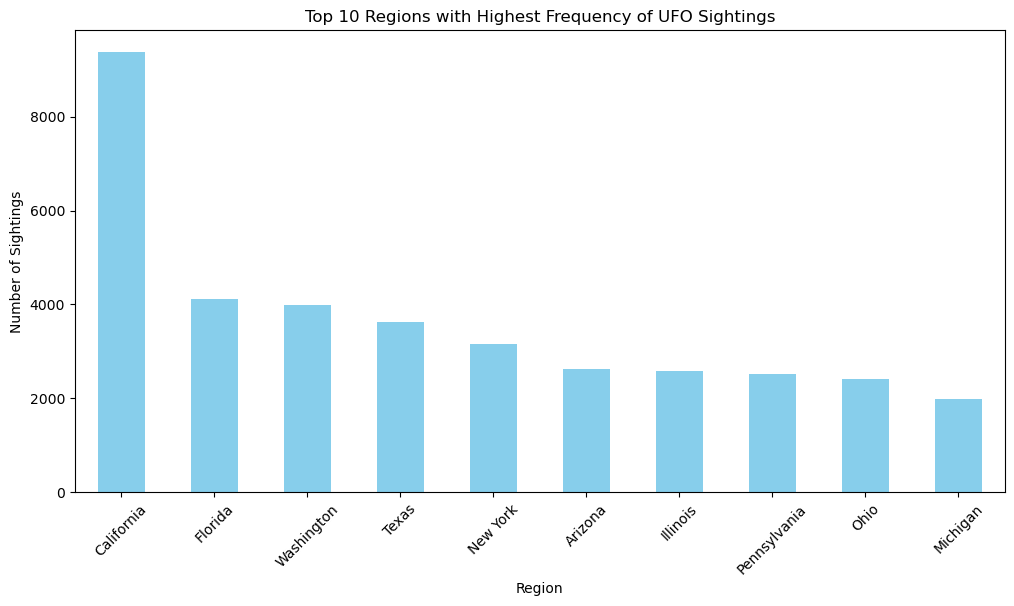

Month
1     5439
2     4422
3     5223
4     5309
5     5106
6     7880
7     9305
8     8382
9     7378
10    7222
11    6529
12    5473
Name: count, dtype: int64


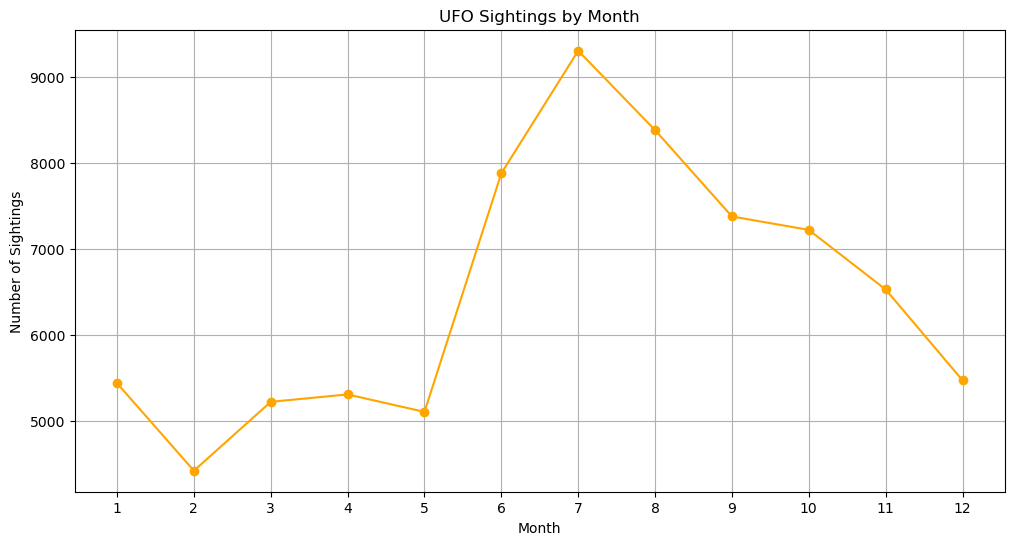

In [78]:
# Frequency of sightings by region
region_counts = ufo_df['Region'].value_counts().head(10)  # Top 10 regions
print(region_counts)

# Plotting the top regions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Regions with Highest Frequency of UFO Sightings')
plt.xlabel('Region')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# Frequency of sightings by time (Month)
monthly_counts = ufo_df['Month'].value_counts().sort_index()
print(monthly_counts)

# Plotting the monthly sightings
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='orange')
plt.title('UFO Sightings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.xticks(range(1, 13))
plt.grid()
plt.show()


### Question 2: Are there notable patterns in UFO shapes, descriptions, or lengths of encounters?

UFO_shape
Light        16423
Triangle      7809
Circle        7530
Fireball      6160
Other         5599
Unknown       5524
Sphere        5347
Disk          5148
Oval          3695
Formation     2431
Name: count, dtype: int64


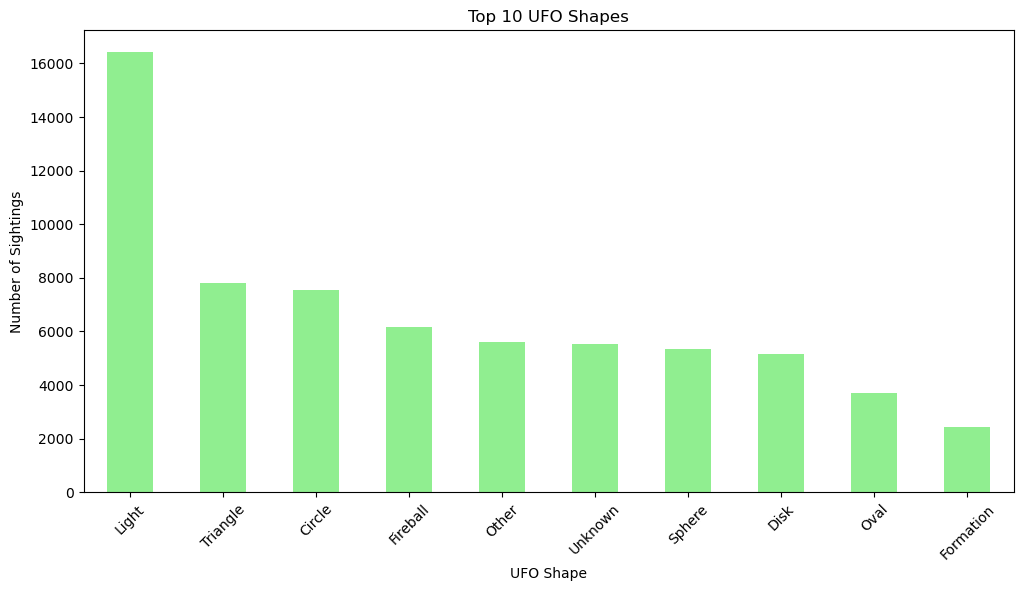

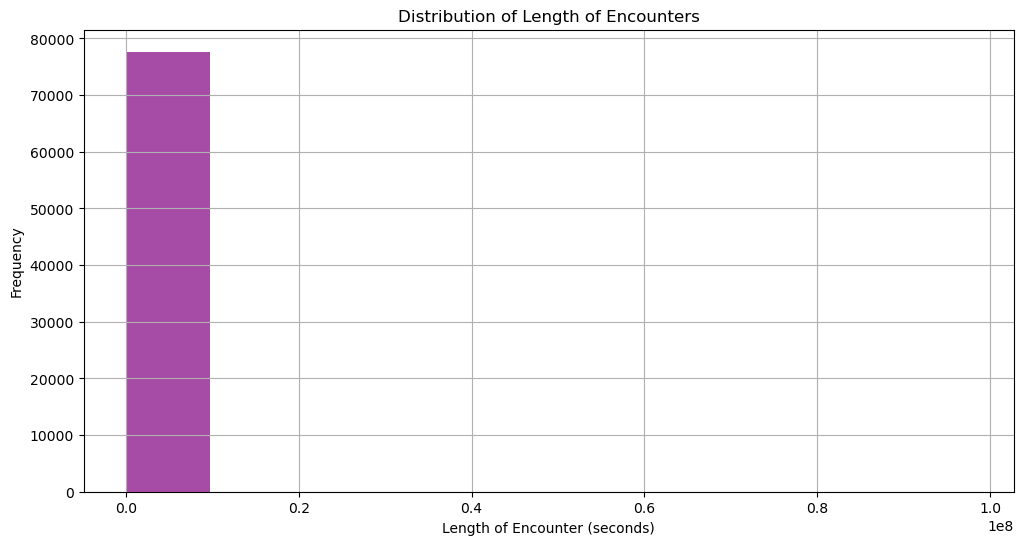

In [79]:
# Frequency of different UFO shapes
shape_counts = ufo_df['UFO_shape'].value_counts().head(10)
print(shape_counts)

# Plotting UFO shapes
plt.figure(figsize=(12, 6))
shape_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# Analyze lengths of encounters
plt.figure(figsize=(12, 6))
plt.hist(ufo_df['length_of_encounter_seconds'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Length of Encounters')
plt.xlabel('Length of Encounter (seconds)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


## Question 3:  Can any correlations be drawn between the timing (season, time of day) and the likelihood of a sighting?

Season
Summer    25567
Autumn    21129
Spring    15638
Winter    15334
Name: count, dtype: int64


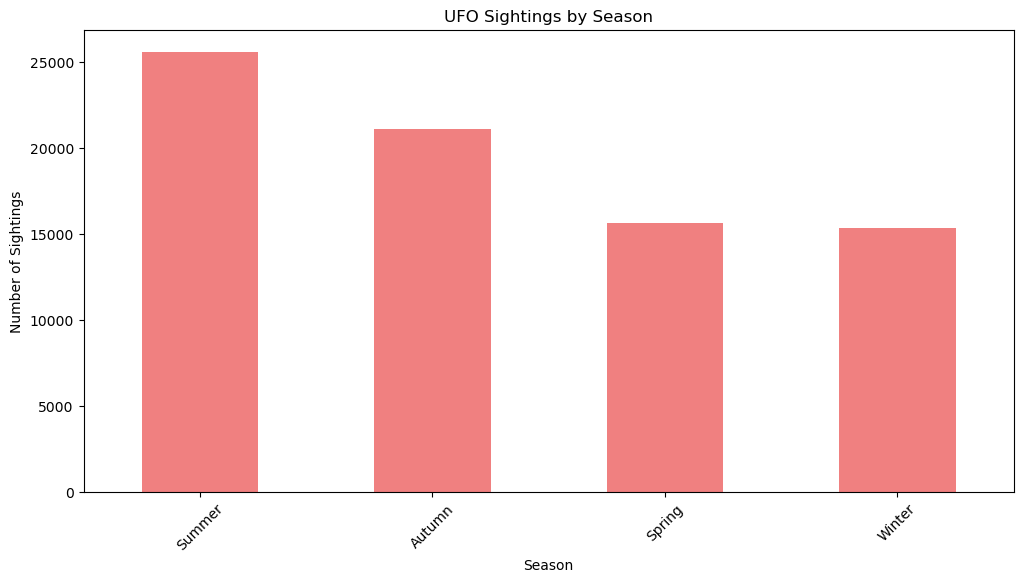

Hour
0      4594
1      3073
2      2240
3      1927
4      1469
5      1526
6      1182
7       874
8       786
9       939
10     1132
11     1116
12     1323
13     1259
14     1280
15     1400
16     1573
17     2518
18     3886
19     5925
20     8383
21    11106
22    10481
23     7676
Name: count, dtype: int64


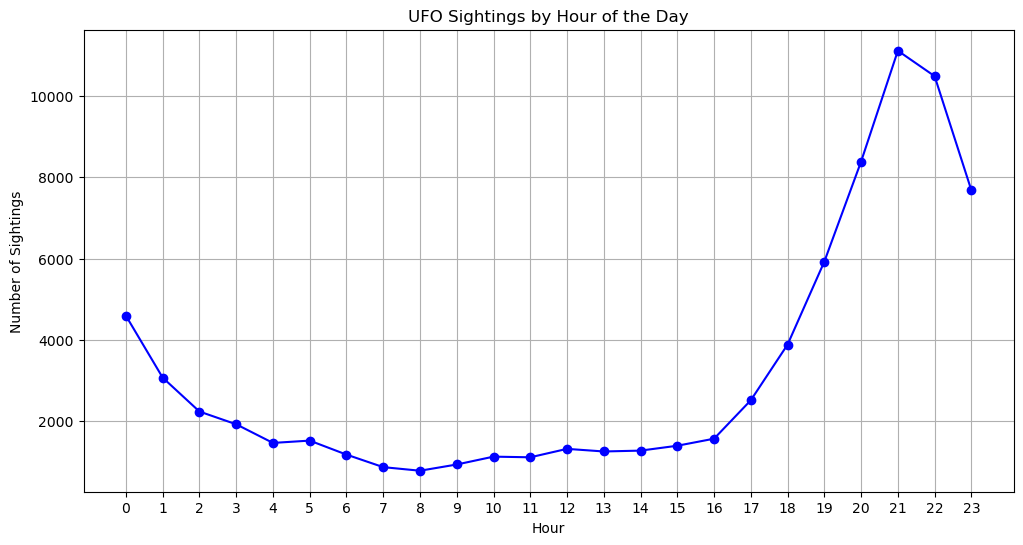

In [80]:
# Count sightings by season
season_counts = ufo_df['Season'].value_counts()
print(season_counts)

# Plotting sightings by season
plt.figure(figsize=(12, 6))
season_counts.plot(kind='bar', color='lightcoral')
plt.title('UFO Sightings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# Count sightings by Hour
hour_counts = ufo_df['Hour'].value_counts().sort_index()
print(hour_counts)

# Plotting sightings by Hour
plt.figure(figsize=(12, 6))
hour_counts.plot(kind='line', marker='o', color='blue')
plt.title('UFO Sightings by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Sightings')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


Analysis

Conclusions

Next Steps 